# Scikit Learn

# Import necessary packages and  modules

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import pandas_profiling as pp
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Load the dataset and do EDA

In [2]:
iris = pd.read_csv(r"C:\Users\wilson.adejo\Desktop\iris.csv")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris.shape   # use for finding the number of rows and columns)

(150, 5)

In [5]:
iris.sample()
iris.isnull()
iris.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [6]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA in a single line of code

In [33]:
pp.ProfileReport(iris)

# Visualisation of  dataset


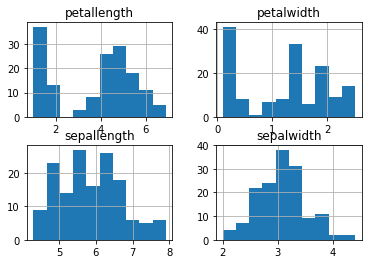

In [7]:
iris.hist()
plt.show()

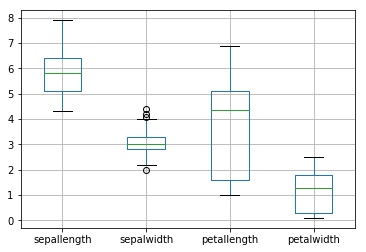

In [8]:
iris.boxplot()

C:\Users\wilson.adejo\Documents\Python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


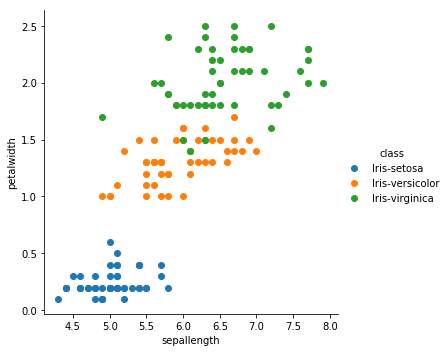

In [9]:
#This can only be used for two attributes at a time
sns.FacetGrid(iris,hue="class", size=5)\
.map(plt.scatter,"sepallength","petalwidth")\
.add_legend()

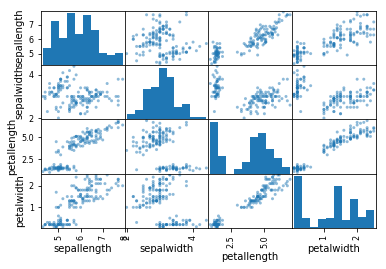

In [10]:
# scatter plot matrix
#from pandas.tools.plotting import scatter_matrix or use
from pandas.plotting import scatter_matrix
scatter_matrix(iris)
plt.show()

# Separate the dataset into Features  and Label( Target) i.e dependent and independent variables

In [11]:
x = iris.iloc[:,1:4]
y =iris.iloc[ :,4]
print(x.head())
print(y.head())


   sepalwidth  petallength  petalwidth
0         3.5          1.4         0.2
1         3.0          1.4         0.2
2         3.2          1.3         0.2
3         3.1          1.5         0.2
4         3.6          1.4         0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object


# Split the dataset into training and  test sets


In [12]:
# Split-out validation dataset, testsize is the nos of test dat to use and random state 
# 65% of which we will use to train our models and 35% that we will hold back as a test dataset
#sklearn train test split is used to split the dataset

In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=.35, random_state=0)

#check the spliting of the dataset for correctness
x_train
y_train
x_test
y_test
print(y_test.head(10))

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
Name: class, dtype: object


# Train and test the model

In [14]:
clf=GaussianNB()
dt_train=clf.fit(x_train,y_train)
dt_train

#Testing the model
# note the difference btw using using .predict (that is used in just predicted class) and .score which 
# is used in getting the %accuracy and compare the prediction to the actual y_test
dt_train.predict(x_test)
dt_train.score(x_test,y_test)

0.9433962264150944

# Support Vector Machine

In [15]:
#Training and fitting the model
from sklearn.svm  import SVC
#clf2=SVC()
#sv_train=clf2.fit(x_train, y_train)
#sv_train

## orsimply use
sv_train=SVC().fit(x_train,y_train)
sv_train

C:\Users\wilson.adejo\Documents\Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
# Model the test data
sv_train.predict(x_test)
sv_train.score(x_test,y_test)

0.9811320754716981

# Random Forest

In [17]:
#Training and fitting
from sklearn.ensemble import RandomForestClassifier
rf_train=RandomForestClassifier().fit(x_train,y_train)
rf_train

C:\Users\wilson.adejo\Documents\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
# Modelling the dataset
rf_train.predict(x_test)
rf_train.score(x_test,y_test)


0.9622641509433962

# Logistic Regresion

In [19]:
# Train  the iris using multinomial logistic regression because of more than two labels/targets
from sklearn.linear_model import LogisticRegression
mul_lr=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)
mul_lr 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
#Modelling the test set
mul_pred=mul_lr.predict(x_test)
mul_pred
mul_score=mul_lr.score(x_test,y_test)
mul_score   # Note-score is thesame as mean accuracy on the given test data and labels.

0.9811320754716981

# X-Gboost

In [21]:
#Training and Fitting
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#NOTE
#The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the 
# XGBoost library with the hyper-parameters passed as arguments. For classification problems, 
#you would have used the XGBClassifier() class.

xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_train=xg_reg.fit(x_train,y_train)  
xg_train

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [22]:
#Modelling the test data
xg_train.predict(x_test)
xg_train.score(x_test,y_test)

# assign the model to name
xg_pred=xg_train.predict(x_test)
xg_score=xg_train.score(x_test,y_test)
print(xg_pred)
print(xg_score)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']
0.9622641509433962


In [23]:
# This is another method of doing accuracy apart fro using .score functions above
accuracy = accuracy_score(y_test, xg_pred)
print(accuracy)
accuracy = accuracy_score(y_test, xg_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



0.9622641509433962
Accuracy: 96.23%


In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, xg_pred)
print(confusion)

[[16  0  0]
 [ 0 20  1]
 [ 0  1 15]]


In [25]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, xg_pred)
print(report)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.94      0.94      0.94        16

      micro avg       0.96      0.96      0.96        53
      macro avg       0.96      0.96      0.96        53
   weighted avg       0.96      0.96      0.96        53



# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier
clf = neigh(n_neighbors = 10)
knn_clf=clf.fit(x_train, y_train)
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [27]:
knn_clf.predict(x_test)
knn_clf.score(x_test,y_test)
knn_pred=knn_clf.predict(x_test)
knn_score=knn_clf.score(x_test,y_test)
print(knn_pred)
print(knn_score)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']
0.9811320754716981


In [28]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.11%
